# Ejercicios 2 y 3 - Guía 1 

## Ejercicio 2

Generar 100 observaciones de una distribución N (0, 1) y calcular un intervalo de confianza del
95% para la función de distribución acumulada 𝐹 .
Repetir esto 1000 veces y calcular la cuántas veces el intervalo de confianza contiene la verdadera función de distribución.

## Desarrollo - Ejercicio 2

Primero genero las 100 observaciones de la distribución normal N(0,1):

In [1]:
from scipy.stats import norm

normal_stdr = norm(0,1)

lista_obs = normal_stdr.rvs(size=100)

Ahora calculo el intervalo de confianza para la F:

In [3]:
import numpy as np
from scipy import stats

# Calculo la F Empírica
F_empirica = stats.ecdf(lista_obs)

def calcular_intervalo_confianza_F(ecdf,alpha=0.05):
    """
    Calcula el intervalo de confianza para una función de distribución empírica (F).
    Parámetros:
    - ecdf: objeto ECDF (Empirical Cumulative Distribution Function) que representa la función de distribución empírica.
    - alpha: nivel de significancia para el intervalo de confianza (por defecto es 0.05).
    Retorna:
    - L: lista de límites inferiores del intervalo de confianza.
    - U: lista de límites superiores del intervalo de confianza.
    """
    # Listas de límites superiores e inferiores
    L = []
    U = [] 
    
    # Calculo el n
    n = len(ecdf.probabilities)
    
    # Calculo el epsilon_n
    epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
    
    # Para cada punto de la F empírica voy rellenando a L y U para obtener el intervalo de confianza
    for i in range(0,n):
        L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
        U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
        L.append(L_i)
        U.append(U_i)
        
    # Retorno los límites inferiores y superiores  
    return L,U

# Calculo el intervalo de confianza 95% para las observaciones que generé 
L,U = calcular_intervalo_confianza_F(F_empirica.cdf)

Y ahora genero un gráfico para observar el intervalo calculado:

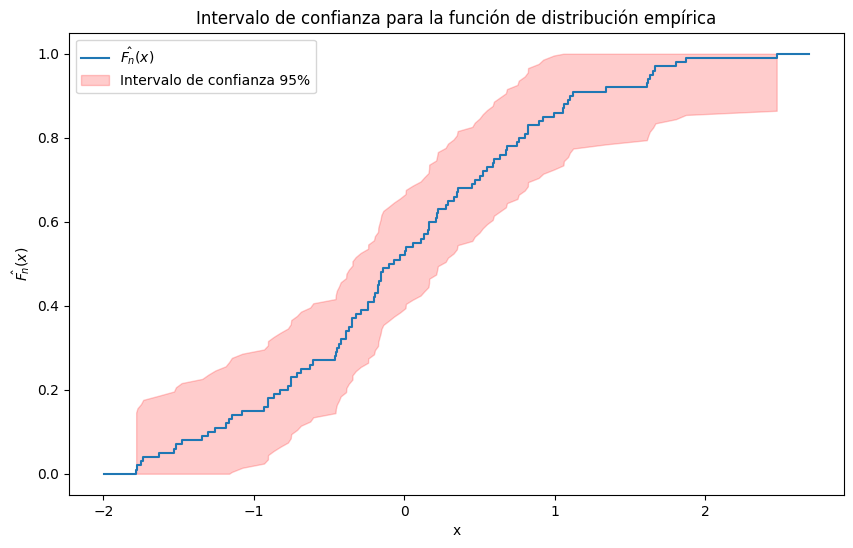

In [12]:
import matplotlib.pyplot as plt

# Genero un gráfico del intervalo de confianza
fig, ax = plt.subplots(figsize=(10,6))

# Grafico la F empírica
F_empirica.cdf.plot(ax=ax, label=r'$\hat{F_n}(x)$')

# Grafico el intervalo de confianza
ax.fill_between(F_empirica.cdf.quantiles, L, U, alpha=0.2, color='r', label='Intervalo de confianza 95%')

# Configuración del gráfico
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
ax.set_title('Intervalo de confianza para la función de distribución empírica')
ax.legend()

Si bien este sería un flujo de trabajo adecuado para generar el intervalo de confianza, ahora la idea es hacer 1000 repeticiones de esto y contar cuantas veces estuvo la verdadera F(x) (no la empírica) dentro de nuestro intervalo de confianza. Sin más que decir procedo a realizar el experimento:

In [22]:
def experimento_intervalo_confianza_norm(n_iteraciones, alpha=0.05):
    """
    Realiza un experimento de n_iteraciones para calcular la cantidad de veces que el intervalo de confianza
    calculado a partir de una muestra de 100 datos contiene a la verdadera función de distribución de una N(0,1).
    """
    
    # Inicializo un contador
    n_contenidos = 0
    
    for i in range(n_iteraciones):
        # Genero una muestra de 100 datos
        lista_obs = norm.rvs(size=100)
        
        # Calculo la F Empírica
        F_empirica = stats.ecdf(lista_obs)
        
        # Calculo la CDF verdadera
        F_verdadera = stats.norm.cdf(F_empirica.cdf.quantiles)
        
        # Calculo el intervalo de confianza
        L, U = calcular_intervalo_confianza_F(F_empirica.cdf, alpha)
        
        # Verifico si la verdadera función de distribución está contenida en el intervalo de confianza
        if np.all((F_verdadera >= L) & (F_verdadera <= U)):
            n_contenidos += 1
    
    return n_contenidos

# Realizo el experimento
print(experimento_intervalo_confianza_norm(1000))

958


Podemos ver que para nuestro experimento de 1000 iteraciones obtuvimos que **958 veces** estuvo contenida la verdadera F(X) dentro del intervalo de confianza.

## Ejercicio 3

Repetir el ejercicio anterior para la distribución de Cauchy y la exponencial.

## Desarrollo - Ejercicio 3

El flujo para realizar este ejercicio sería el mismo que se usó con la normal, por lo tanto paso directo a generar una función más general para llevar a cabo los experimentos.

In [28]:
def experimento_intervalo_confianza(n_iteraciones, distribucion, alpha=0.05):
    """
    Realiza un experimento de n_iteraciones para calcular la cantidad de veces que el intervalo de confianza
    calculado a partir de una muestra de 100 datos contiene a la verdadera función de distribución de una 
    distribución dada.
    """
    
    # Inicializo un contador
    n_contenidos = 0
    
    for i in range(n_iteraciones):
        # Genero una muestra de 100 datos
        lista_obs = distribucion.rvs(size=100)
        
        # Calculo la F Empírica
        F_empirica = stats.ecdf(lista_obs)
        
        # Calculo la CDF verdadera
        F_verdadera = distribucion.cdf(F_empirica.cdf.quantiles)
        
        # Calculo el intervalo de confianza
        L, U = calcular_intervalo_confianza_F(F_empirica.cdf, alpha)
        
        # Verifico si la verdadera función de distribución está contenida en el intervalo de confianza
        if np.all((F_verdadera >= L) & (F_verdadera <= U)):
            n_contenidos += 1
    
    return n_contenidos

Ahora pruebo con la distribución Cauchy:

In [29]:
from scipy.stats import cauchy

# Realizo el experimento
print(experimento_intervalo_confianza(1000, cauchy))

960


Ahora pruebo con la exponencial:

In [30]:
from scipy.stats import expon

# Realizo el experimento
print(experimento_intervalo_confianza(1000, expon))

967
